In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class LinearRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.linear_1 = torch.nn.Linear(input_dim, 5)
        self.linear_2 = torch.nn.Linear(5, output_dim)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        out = self.linear_1(x)
        out = self.linear_2(out)
        out = self.relu(out)
        return out

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

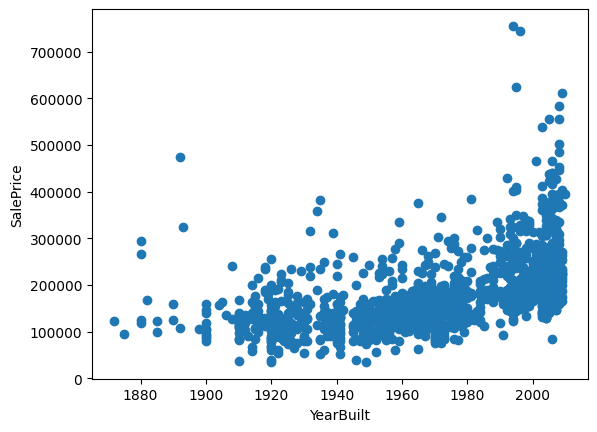

In [47]:
# x - дата строительства дома
# y - стоимость
data_train = pd.read_csv('data1/train.csv')
data_test = pd.read_csv('data1/test.csv')

train_x = np.array(data_train['YearBuilt']).reshape(-1, 1)
train_y = np.array(data_train['SalePrice']).reshape(-1, 1)

test_x = np.array(data_test['YearBuilt']).reshape(-1, 1)

plt.scatter(train_x, train_y)
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.show()

In [38]:
model = LinearRegression(1, 1).to(device)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

inputs = torch.from_numpy(train_x).float()
labels = torch.from_numpy(train_y).float()

inputs = inputs.to(device)
labels = labels.to(device)

for epoch in range(200000):
    model.train()
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 100 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch + 1, 200000, loss.item()))

Epoch [100/200000], Loss: 30877425664.0000
Epoch [200/200000], Loss: 15553931264.0000
Epoch [300/200000], Loss: 7195595776.0000
Epoch [400/200000], Loss: 6111024640.0000
Epoch [500/200000], Loss: 6084233728.0000
Epoch [600/200000], Loss: 6084072960.0000
Epoch [700/200000], Loss: 6084071936.0000
Epoch [800/200000], Loss: 6084070400.0000
Epoch [900/200000], Loss: 6084070400.0000
Epoch [1000/200000], Loss: 6084070400.0000
Epoch [1100/200000], Loss: 6084069376.0000
Epoch [1200/200000], Loss: 6084068352.0000
Epoch [1300/200000], Loss: 6084067840.0000
Epoch [1400/200000], Loss: 6084066816.0000
Epoch [1500/200000], Loss: 6084066816.0000
Epoch [1600/200000], Loss: 6084065792.0000
Epoch [1700/200000], Loss: 6084064768.0000
Epoch [1800/200000], Loss: 6084064256.0000
Epoch [1900/200000], Loss: 6084062720.0000
Epoch [2000/200000], Loss: 6084062208.0000
Epoch [2100/200000], Loss: 6084059648.0000
Epoch [2200/200000], Loss: 6084058624.0000
Epoch [2300/200000], Loss: 6084057600.0000
Epoch [2400/200000

In [39]:
torch.save(model.state_dict(), 'first.ckpt')

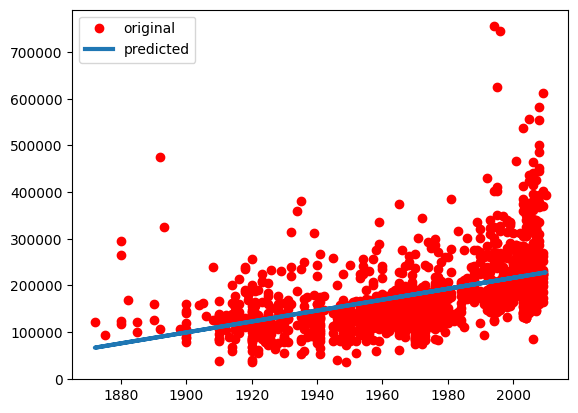

In [43]:
with torch.no_grad():
    model.eval()
    predicted = model.to('cpu')(torch.from_numpy(train_x).float())
    plt.plot(train_x, train_y, 'ro', label='original')
    plt.plot(train_x, predicted, lw=3, label='predicted')
    plt.legend()
    plt.show()

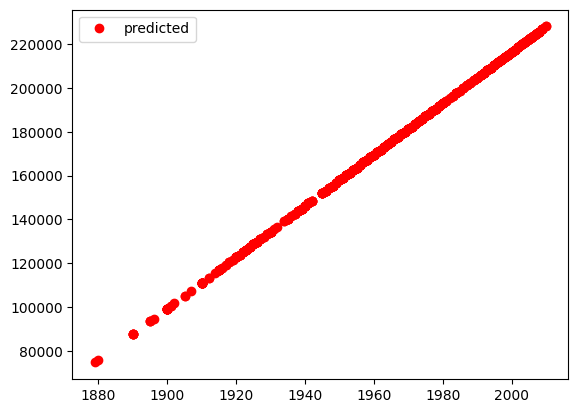

In [45]:
# предскажем цену для тестовых данных
with torch.no_grad():
    model.eval()
    predicted = model.to('cpu')(torch.from_numpy(test_x).float())
    plt.plot(test_x, predicted, 'ro', label='predicted')
    plt.legend()
    plt.show()